<a href="https://colab.research.google.com/github/XavierCarrera/Project-Cronos/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import json 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import joblib

%matplotlib inline
plt.rcParams['figure.figsize'] = (50, 25)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

# Data Engineering

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/XavierCarrera/Project-Cronos/main/model-training/cost-of-living.csv')
df = df.T
df.columns = df.iloc[0]
df.drop(["Unnamed: 0"], axis=0, inplace=True)
df

Unnamed: 0,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
Unnamed: 0,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three...",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, G...",1 min. of Prepaid Mobile Tariff Local (No Disc...,"Internet (60 Mbps or More, Unlimited Data, Cab...","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in Cit...,Price per Square Meter to Buy Apartment Outsid...,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yea...",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red M...,Toyota Corolla 1.6l 97kW Comfort (Or Equivalen...,"Preschool (or Kindergarten), Full Day, Private...","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.4,524.45,344.27,

In [14]:
df.isnull().sum()

Unnamed: 0
Meal, Inexpensive Restaurant                                                  0
Meal for 2 People, Mid-range Restaurant, Three-course                         0
McMeal at McDonalds (or Equivalent Combo Meal)                                0
Domestic Beer (0.5 liter draught)                                             0
Imported Beer (0.33 liter bottle)                                             0
Coke/Pepsi (0.33 liter bottle)                                                0
Water (0.33 liter bottle)                                                     0
Milk (regular), (1 liter)                                                     0
Loaf of Fresh White Bread (500g)                                              0
Eggs (regular) (12)                                                           0
Local Cheese (1kg)                                                            0
Water (1.5 liter bottle)                                                      0
Bottle of Wine (Mid-Range)   

In [15]:
df.dtypes

Unnamed: 0
Meal, Inexpensive Restaurant                                                  object
Meal for 2 People, Mid-range Restaurant, Three-course                         object
McMeal at McDonalds (or Equivalent Combo Meal)                                object
Domestic Beer (0.5 liter draught)                                             object
Imported Beer (0.33 liter bottle)                                             object
Coke/Pepsi (0.33 liter bottle)                                                object
Water (0.33 liter bottle)                                                     object
Milk (regular), (1 liter)                                                     object
Loaf of Fresh White Bread (500g)                                              object
Eggs (regular) (12)                                                           object
Local Cheese (1kg)                                                            object
Water (1.5 liter bottle)                              

In [16]:
df = df.astype(int)
df.dtypes

Unnamed: 0
Meal, Inexpensive Restaurant                                                  int64
Meal for 2 People, Mid-range Restaurant, Three-course                         int64
McMeal at McDonalds (or Equivalent Combo Meal)                                int64
Domestic Beer (0.5 liter draught)                                             int64
Imported Beer (0.33 liter bottle)                                             int64
Coke/Pepsi (0.33 liter bottle)                                                int64
Water (0.33 liter bottle)                                                     int64
Milk (regular), (1 liter)                                                     int64
Loaf of Fresh White Bread (500g)                                              int64
Eggs (regular) (12)                                                           int64
Local Cheese (1kg)                                                            int64
Water (1.5 liter bottle)                                         

# Análisis Exploratorio de Datos

In [20]:
df.describe()

Unnamed: 0,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
count,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.0,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,7.481250,35.293750,5.25625,2.787500,3.250000,0.743750,0.462500,0.381250,0.668750,1.387500,7.543750,0.331250,8.081250,0.912500,1.600000,4.775000,0.787500,5.550000,41.137500,0.531250,20161.743750,733.356250,525.231250,1354.587500,918.387500,106.581250,0.0,29.168750,35.162500,13.631250,7.018750,55.481250,32.881250,73.47500,84.168750,3890.893750,2406.868750,1446.712500,6.30625,1.637500,0.525000,13.775000,1.450000,1.312500,0.593750,0.431250,1.912500,1.081250,1.350000,0.912500,0.575000,9.112500,20496.537500,446.981250,8039.131250
std,4.572232,18.935374,2.05658,2.201736,2.006279,0.779024,0.623315,0.536374,0.774774,0.792952,3.571105,0.510541,4.395498,1.005566,0.939691,3.901217,0.999292,3.031906,31.255186,0.500589,7042.020038,549.626864,416.411462,999.566978,699.582247,51.569636,0.0,18.921294,15.075027,6.684839,3.466773,18.079479,6.412813,14.81031,26.220694,3853.015283,2323.124802,1257.351526,5.76696,1.619409,0.735018,13.814107,1.180555,0.978945,0.779428,0.567704,1.011801,1.039907,1.128254,0.565101,0.705326,4.948779,6037.672647,421.356293,5972.749026
min,1.000000,7.000000,2.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,9343.000000,138.000000,79.000000,285.000000,169.000000,18.000000,0.0,4.000000,15.000000,1.000000,2.000000,22.000000,17.000000,38.00000,28.000000,573.000000,291.000000,163

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd490a9e940>,
      dtype=object)

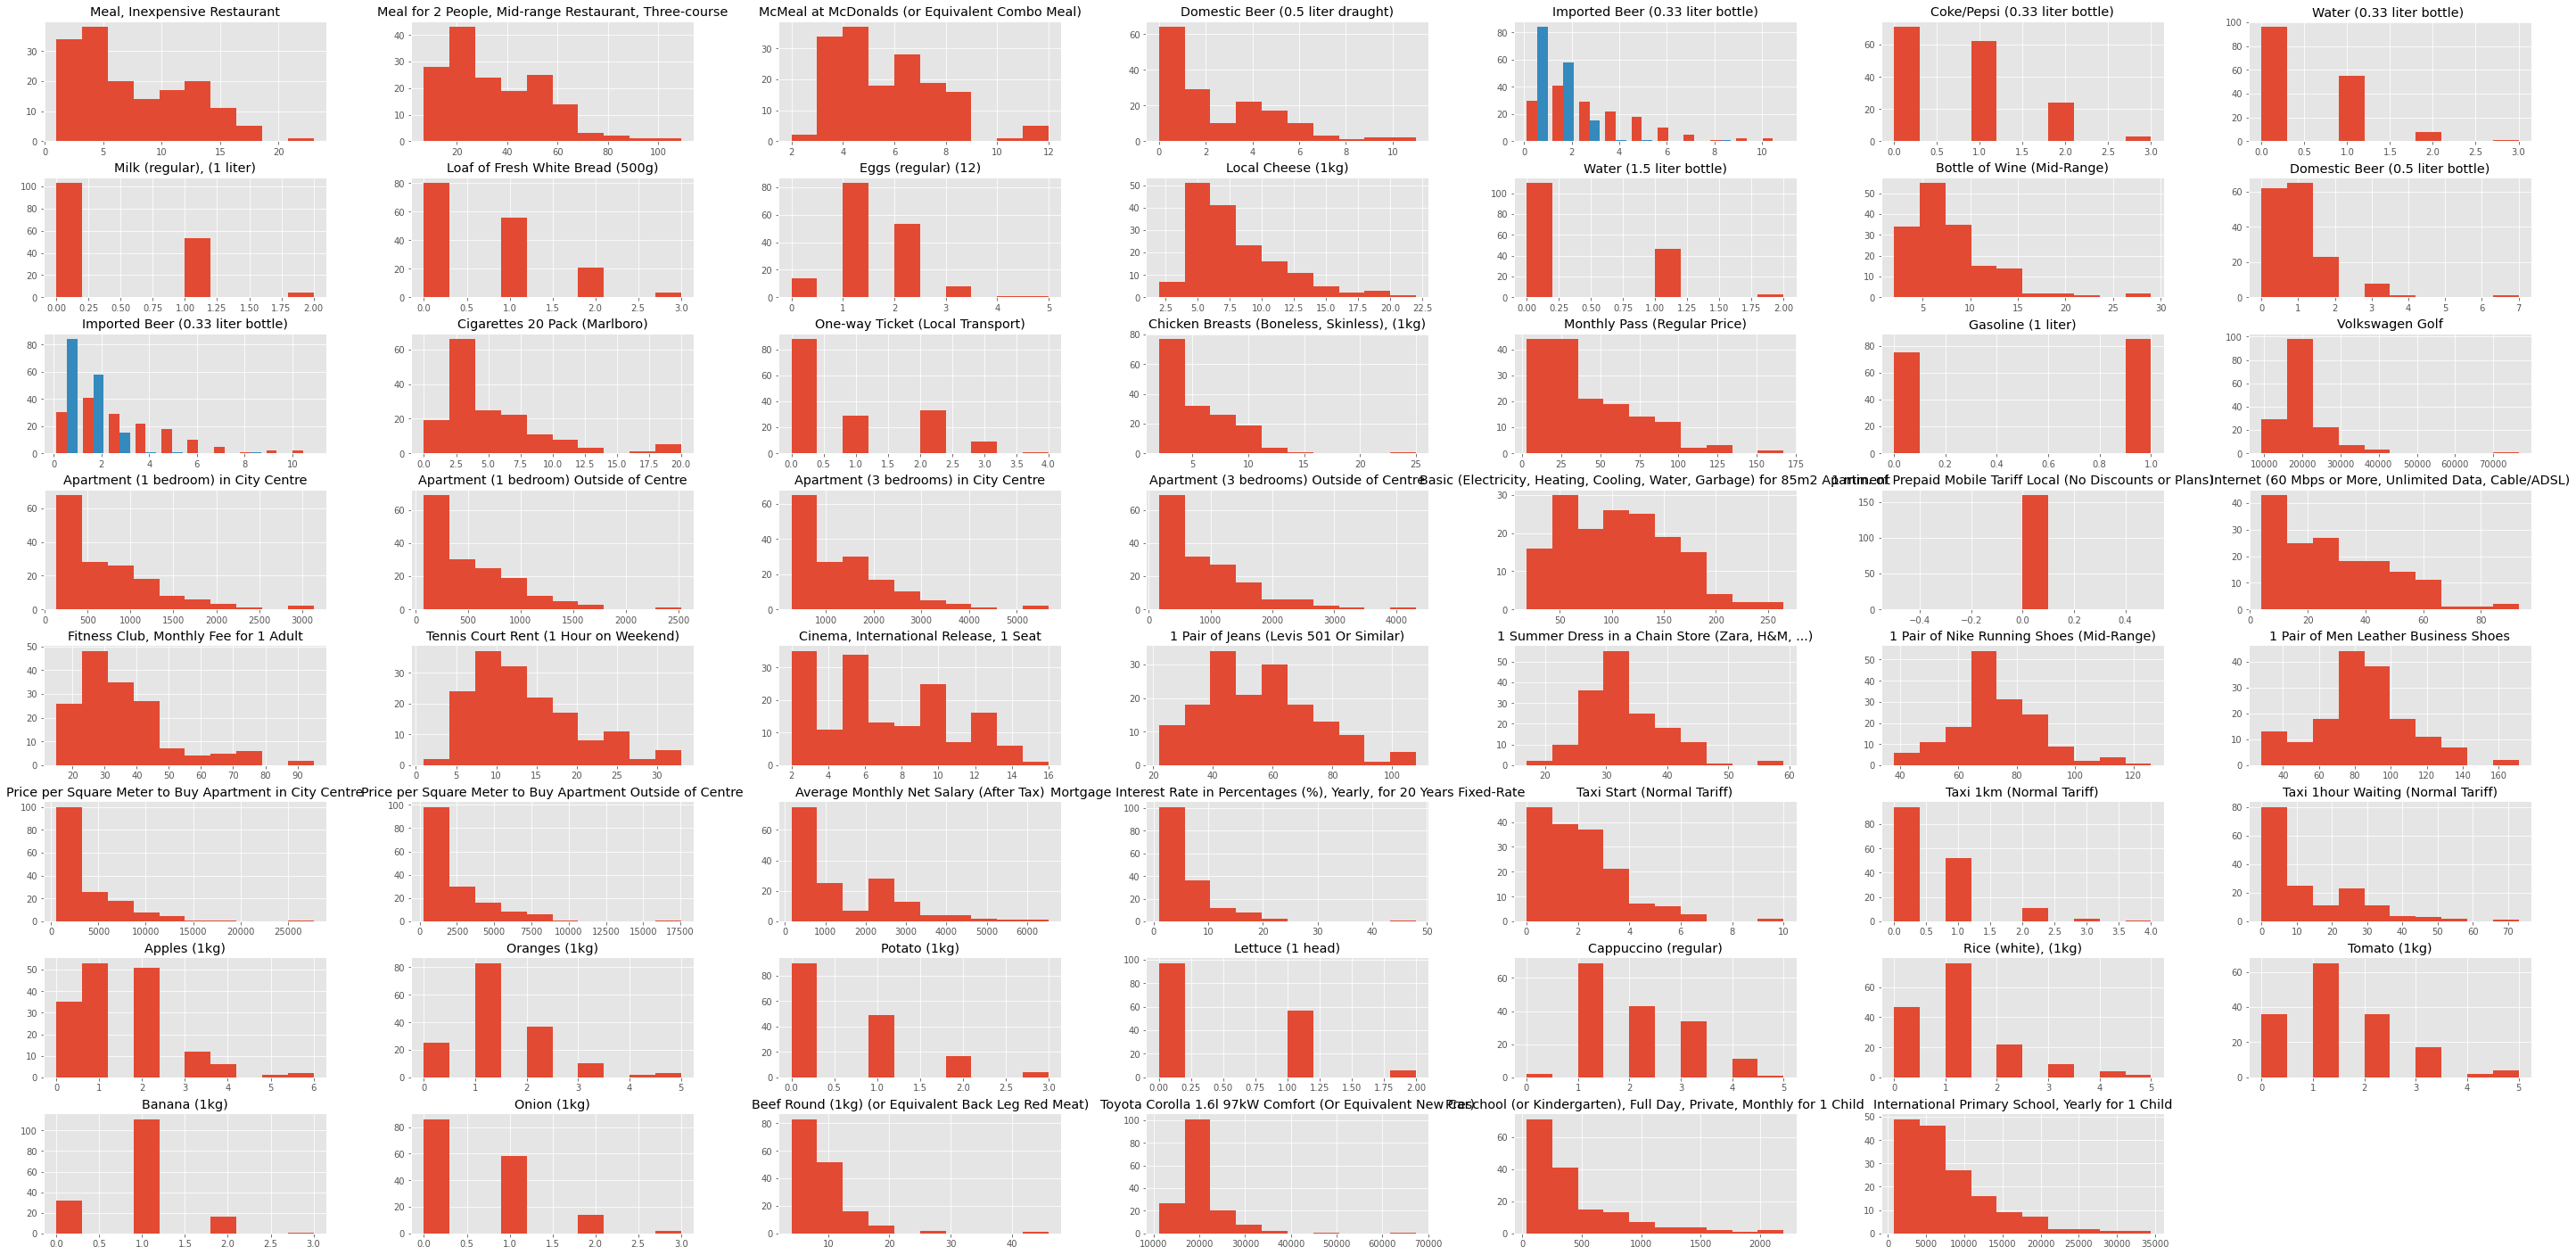

In [24]:
df.hist()

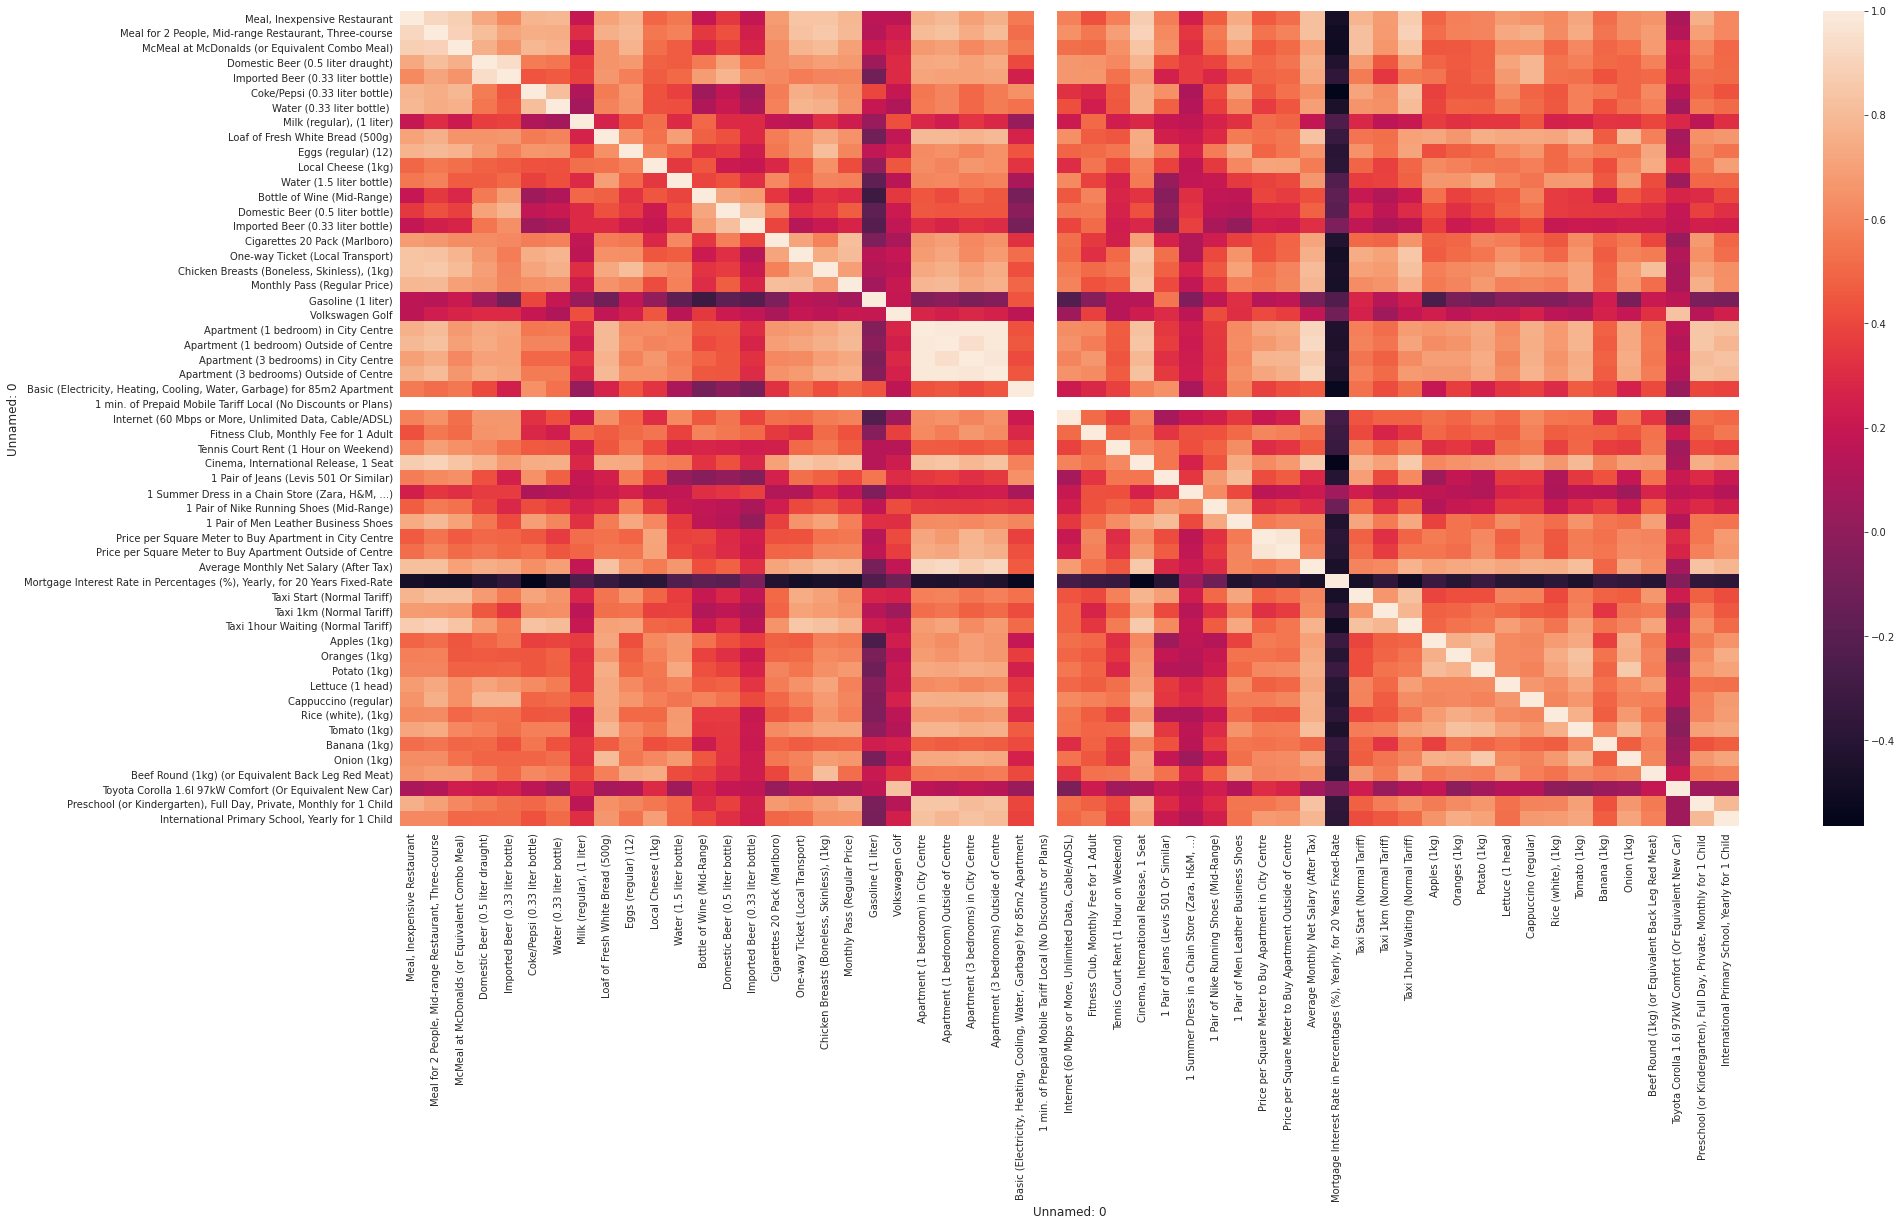

In [40]:
corr = df.corr()

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30,15))
    sns.heatmap(corr, yticklabels=corr.columns, xticklabels=corr.columns)

# Model Training

In [46]:
X = df.drop(["Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate"], axis = 1)
y = df["Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [56]:
reg = RandomForestRegressor(max_depth=4)
reg.fit(X_train, y_train)

y_train_predict = reg.predict(X_train)
y_test_predict = reg.predict(X_test)

In [57]:
r2 = r2_score(y_train, y_train_predict)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print(r2)
print(rmse)

0.911388131143386
1.753856314174942


In [59]:
joblib.dump(reg, "./random_forest_regressor.joblib", compress=True)

['./random_forest_regressor.joblib']